In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.4.1


In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQFLV7H/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQFLV7H/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQFLV7H/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [7]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
# train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
# test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 248s 628ms/step - loss: 0.5925 - accuracy: 0.6433 - val_loss: 0.3102 - val_accuracy: 0.8749
Epoch 2/10
391/391 [==============================] - 247s 629ms/step - loss: 0.2234 - accuracy: 0.9184 - val_loss: 0.3142 - val_accuracy: 0.8723
Epoch 3/10
391/391 [==============================] - 248s 631ms/step - loss: 0.1628 - accuracy: 0.9436 - val_loss: 0.3089 - val_accuracy: 0.8751
Epoch 4/10
391/391 [==============================] - 247s 628ms/step - loss: 0.1310 - accuracy: 0.9551 - val_loss: 0.3442 - val_accuracy: 0.8683
Epoch 5/10
391/391 [==============================] - 244s 622ms/step - loss: 0.0970 - accuracy: 0.9685 - val_loss: 0.4080 - val_accuracy: 0.8642
Epoch 6/10
391/391 [==============================] - 246s 624ms/step - loss: 0.0764 - accuracy: 0.9767 - val_loss: 0.4753 - val_accuracy: 0.8591
Epoch 7/10
391/391 [==============================] - 242s 616ms/step - loss: 0.0574 - accuracy: 0.9845 - val_loss: 0.5452 -

In [12]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

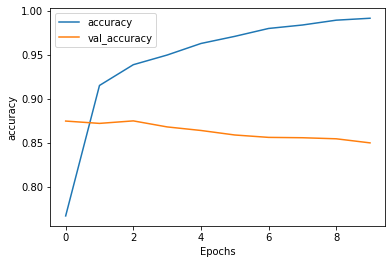

In [13]:
plot_graphs(history, 'accuracy')

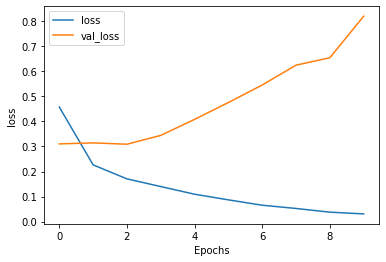

In [14]:
plot_graphs(history, 'loss')